In [1]:
from LTSpice_Simulator import get_Spice_Arrays
from Wavefront_Generation import Full_Cycle
import Wavefront_Plotting as WP
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets
%matplotlib widget

In [2]:
input_values ={
    'L_time':'13',
    'C_time':'7',
    'L_impedance':'200',
    'show_about':False,
    # 'Load_impedance': '10'
}

interface = Full_Cycle(**input_values)

LTSpice_outputs = get_Spice_Arrays(**interface.data_input.SPICE_input_values,Step_size=str(interface.data_input.GCD/8))

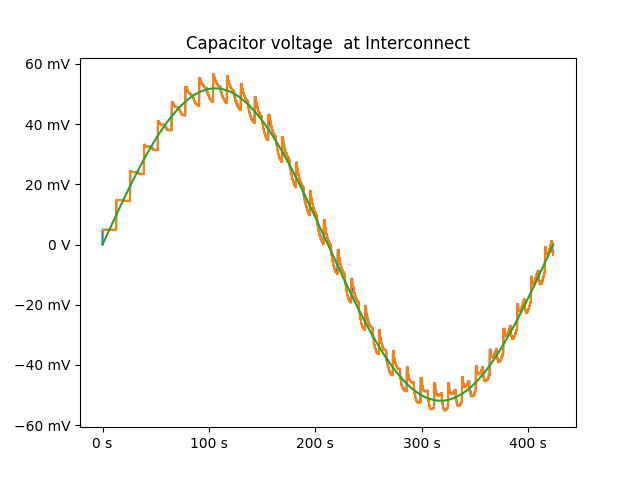

In [3]:
fig,ax = plt.subplots()

ax.plot(LTSpice_outputs['time'],LTSpice_outputs['Capacitor_Current_Tx'])
WP.plot_time_interconnect(interface.data_output_ordered,ax,'Current Capacitor',True)
ax.plot(LTSpice_outputs['time'],LTSpice_outputs['Capacitor_Current_Circuit'])

GridspecLayout(children=(Button(description='step backward', layout=Layout(grid_area='widget001', width='auto'…

FloatSlider(value=0.0, layout=Layout(width='auto'), max=422.8240202016044)

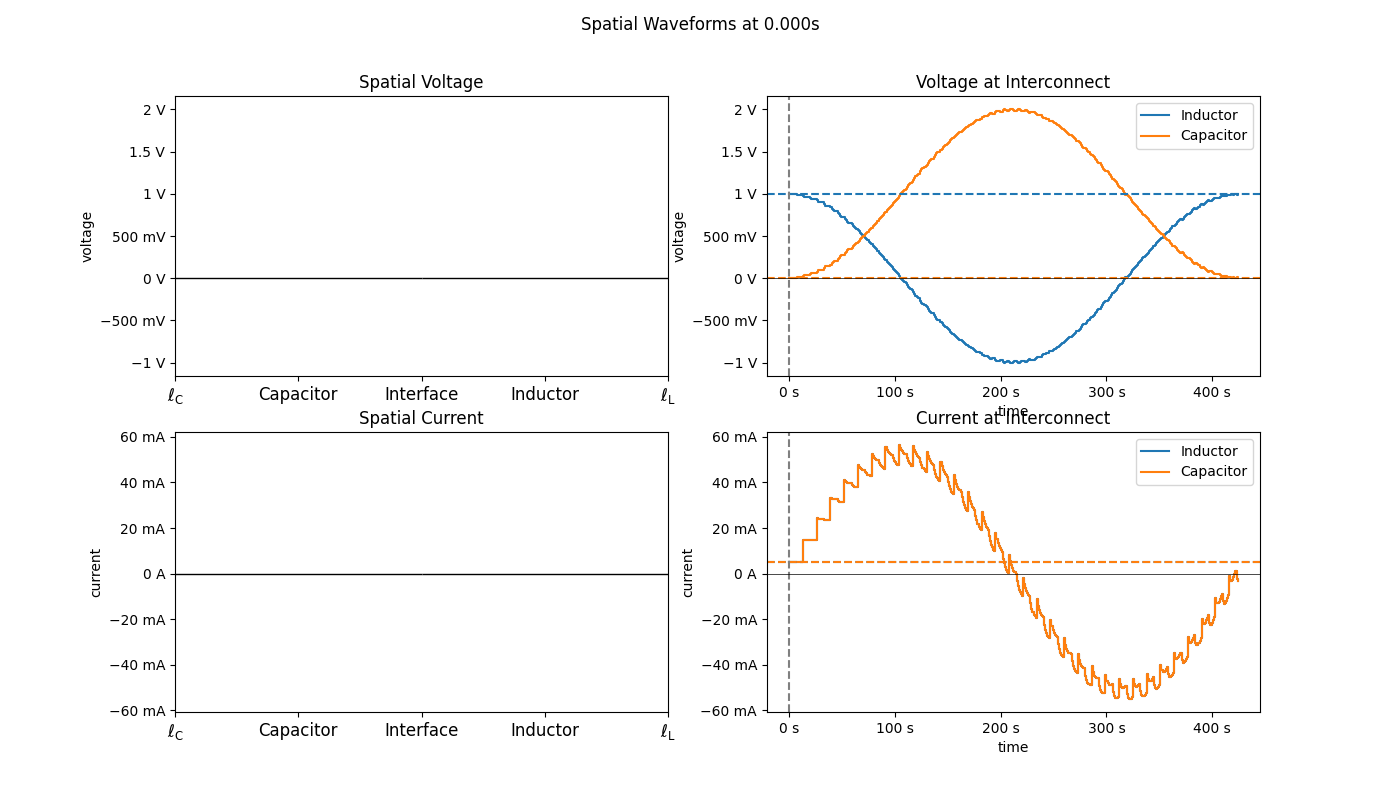

In [4]:
WP.spatial_interconnect_investigator_ui(interface)

interactive(children=(IntSlider(value=10, description='t', layout=Layout(width='auto'), max=423), Output()), _…

<function __main__.plot_path(t)>

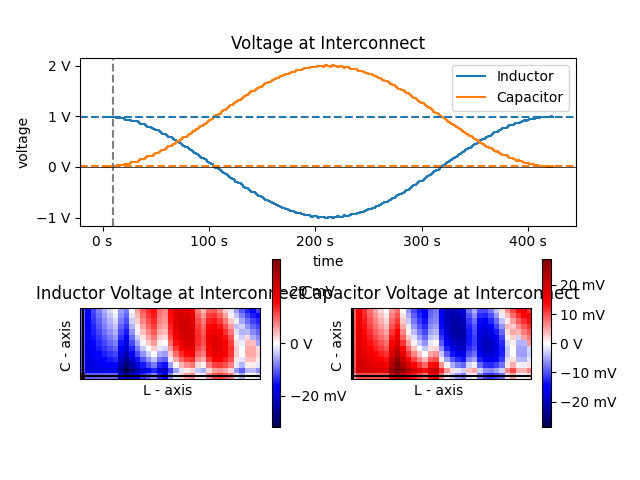

In [6]:
fig_path, ax_path = plt.subplot_mosaic([['V','V'],
                                       ['LF','CF']])

WP.plot_fanout_interconnect(interface.data_output_multiplicative,ax_path['LF'],'voltage inductor')
WP.plot_fanout_interconnect(interface.data_output_multiplicative,ax_path['CF'],'voltage capacitor')

def plot_path(t):
    WP.clear_subplot(ax_path.values())
    
    WP.plot_time_interconnect_and_intercepts_at_time(t,interface,ax_voltage=ax_path['V'])
    WP.plot_fanout_interconnect(interface.data_output_multiplicative,ax_path['LF'],'voltage inductor',show_colour_bar=False)
    WP.plot_fanout_interconnect(interface.data_output_multiplicative,ax_path['CF'],'voltage capacitor',show_colour_bar=False)
    WP.plot_trace_on_merged_fanout_axis(interface,ax_path['LF'],t,show_cross=True)
    WP.plot_trace_on_merged_fanout_axis(interface,ax_path['CF'],t,show_cross=True)
    
interact(plot_path,t=widgets.IntSlider(min=0, max=float(interface.data_input.Simulation_Stop_Time), step=1, value=10, layout=widgets.Layout(width='auto')))